# РК-1 Технологии машинного обучения

**Студент:** Лялько Никита Андреевич  
**Группа:** ИУ5-65Б  
**Вариант:** 13  
**Задача:** 2  
**Датасет:** 5  

## Задание

Для заданного набора данных необходимо выполнить следующие шаги:

1. Обработать пропуски в данных для:
   - Одного категориального признака
   - Одного количественного признака

2. Описать используемые способы обработки пропусков в данных для категориальных и количественных признаков.

3. Определить признаки, которые будут использоваться для дальнейшего построения моделей машинного обучения, и обосновать выбор.

4. Для студентов групп ИУ5-62Б, ИУ5Ц-82Б: Построить гистограмму для произвольной колонки данных.


# Решение
# Загрузка датасета
Для работы с набором данных буду использовать библиотеку pandas, так как это наиболее распространённый и простой в использовании инструмент для решения поставленной задачи.

In [36]:
import pandas as pd

data = pd.read_csv('Admission_Predict.csv', sep=",")

Первичный анализ


In [37]:
print('Всего строк: {}'.format(data.shape[0]))
print('Всего колонок: {}'.format(data.shape[1]))

Всего строк: 400
Всего колонок: 9


In [38]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [39]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Для обработки пропущенных значений в данных этого датасета (Graduate Admission 2) мы можем использовать различные методы в зависимости от типа признака (категориальный или количественный).

# Для категориального признака:
Категориальный признак в данном случае отсутствует, но предположим, у нас есть категориальный признак, такой как "Region" (регион университета).

In [40]:
import numpy as np

regions = ['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Australia']

# Добавляем случайные значения для признака "Region"
data['Region'] = np.random.choice(regions, size=400)
data = pd.DataFrame(data)

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Region
0,1,337,118,4,4.5,4.5,9.65,1,0.92,South America
1,2,324,107,4,4.0,4.5,8.87,1,0.76,North America
2,3,316,104,3,3.0,3.5,8.00,1,0.72,South America
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Africa
4,5,314,103,2,2.0,3.0,8.21,0,0.65,South America


Теперь для обработки пропущенных значений мы можем воспользоваться методом замены пропусков на моду: создать сценарий, где у нас есть пропущенные значения в признаке "Region", и заменить их на самый часто встречающийся регион.

In [41]:
# Заменяем пропущенные значения модой
data['Region'] = data['Region'].fillna(data['Region'].mode()[0])

# Для количественного признака:
Количественные признаки включают GRE Score, TOEFL Score, SOP, LOR, CGPA и Chance of Admit.

Мы будем использовать для них замену пропусков на среднее или медиану:

Для количественных признаков хорошим методом заполнения пропусков может быть замена их средним или медианой, чтобы сохранить статистические характеристики данных.

In [42]:
# Заменяем пропущенные значения медианой
categories = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

for i in categories:
    data[i] = data[i].fillna(data[i].median())

# Выбор признаков для модели машинного обучения:
Для построения моделей машинного обучения из этого набора данных можно использовать следующие признаки:

GRE Score
TOEFL Score
University Rating
SOP
LOR
CGPA
Research
Почему выбор этих признаков важен для моделирования:

Оценки (GRE и TOEFL): Эти показатели являются важными для оценки академической подготовки студента.
Рейтинг университета: Оценка университета, из которого поступает студент, может влиять на вероятность допуска.
SOP (Statement of Purpose) и LOR (Letter of Recommendation): Эти признаки отражают мотивацию и рекомендации соответственно, что также важно для оценки кандидата.
CGPA (Cumulative Grade Point Average): Это важный показатель успеваемости студента.
Research (Исследовательский опыт): Наличие опыта исследований также может быть фактором в принятии решения.
Использование этих признаков позволит построить модель, которая будет учитывать как академические, так и дополнительные факторы, влияющие на вероятность поступления в аспирантуру.

# Доп задание

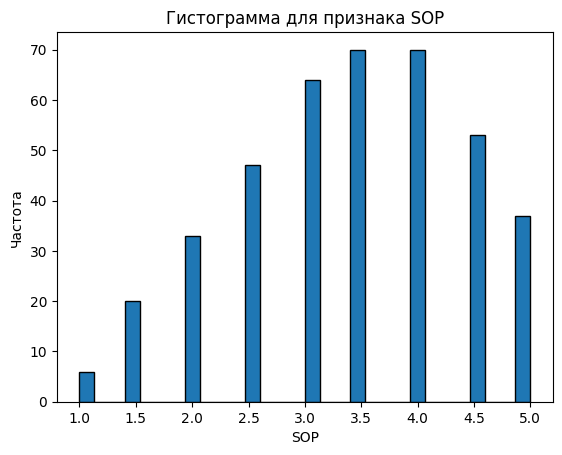

In [43]:
import matplotlib.pyplot as plt
# Построим гистограмму для 'SOP'
plt.hist(data['SOP'], bins=30, edgecolor='black')
plt.title('Гистограмма для SOP')
plt.xlabel('SOP')
plt.ylabel('Частота')
plt.show()